# Tiny ImageNet: Visualize Predictions

1. Loads trained model
2. loads N random images from validation set
3. Predict top-5 classes for each image and compare to actual label
4. Print images, actual labels and top-5 predictions

Python Notebook by Patrick Coady: [Learning Artificial Intelligence](https://pat-coady.github.io/)

In [1]:
from train import *
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import random
import scipy.ndimage
import scipy.misc

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
class TrainConfig(object):
    """Training configuration"""
    dropout_keep_prob = 1.0
    model_name = 'vgg_16'  # choose model 
    model = staticmethod(globals()[model_name])
    config_name = 'baseline'  # choose training run

In [3]:
def predict(imgs, config):
    """Load most recent checkpoint and make prediction"""
    with tf.Graph().as_default():
        img_ph = tf.placeholder(dtype=tf.uint8, shape=(None, 64, 64, 3))
        img = tf.image.crop_to_bounding_box(img_ph, 4, 4, 56, 56)
        logits = config.model(img, config)      
        top_k = tf.nn.top_k(logits, k=5, sorted=True)
        saver = tf.train.Saver()
        with tf.Session() as sess:
            path = 'checkpoints/' + config.model_name + '/' + config.config_name
            saver.restore(sess, tf.train.latest_checkpoint(path))
            feed_dict = {img_ph: imgs}
            top_vals, top_idx = sess.run(top_k, feed_dict=feed_dict)
      
    return top_idx

In [4]:
label_dict, class_description = build_label_dicts()
for i in range(len(class_description)):
    class_description[i] = class_description[i].split(',')[0]

INFO:tensorflow:Restoring parameters from checkpoints/vgg_16/baseline/model-42000


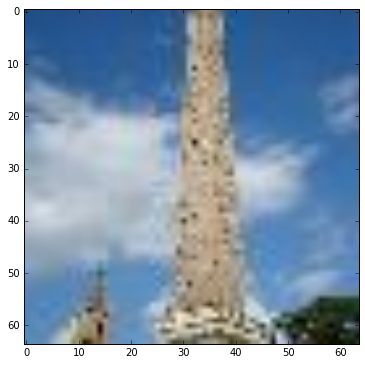

Actual label: obelisk
Top 5 predictions:
['obelisk', 'projectile', 'beacon', 'fountain', 'pole']




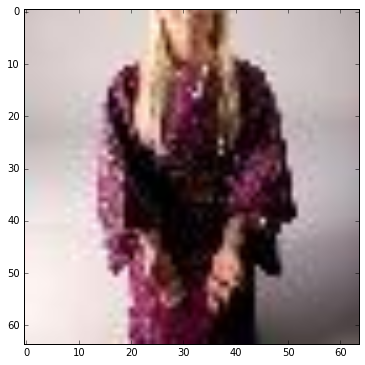

Actual label: kimono
Top 5 predictions:
['fur coat', 'kimono', 'poncho', 'vestment', 'military uniform']




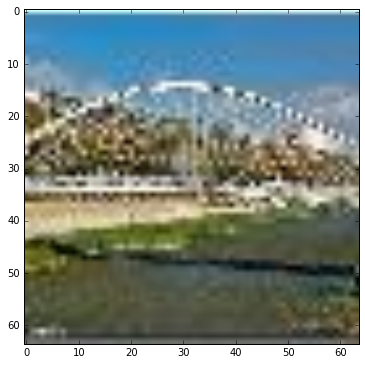

Actual label: steel arch bridge
Top 5 predictions:
['steel arch bridge', 'freight car', 'seashore', 'suspension bridge', 'lakeside']




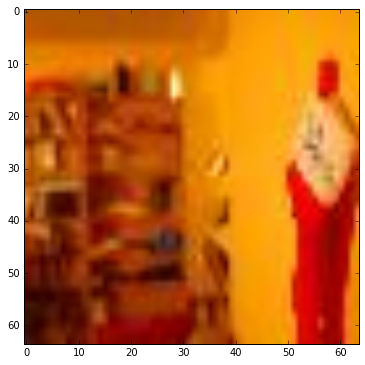

Actual label: Christmas stocking
Top 5 predictions:
['candle', 'torch', 'abacus', 'confectionery', 'oboe']




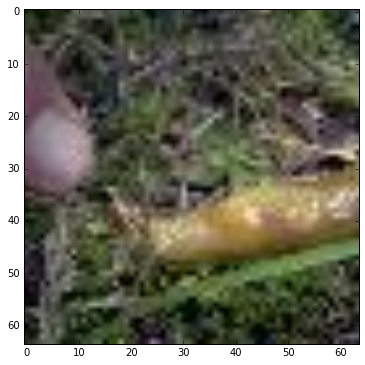

Actual label: slug
Top 5 predictions:
['slug', 'goldfish', 'sea cucumber', 'sea slug', 'cougar']




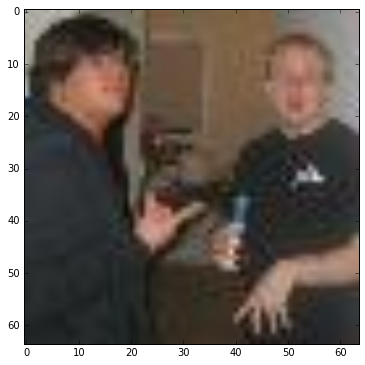

Actual label: syringe
Top 5 predictions:
['plunger', 'bow tie', 'oboe', 'cash machine', 'neck brace']




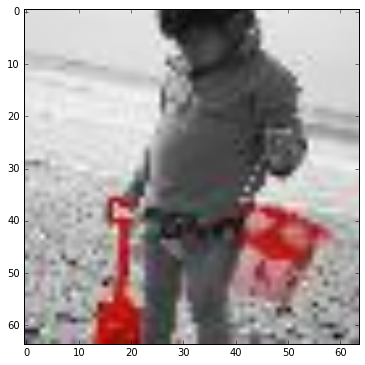

Actual label: bucket
Top 5 predictions:
['snorkel', 'bikini', 'reel', 'swimming trunks', 'miniskirt']




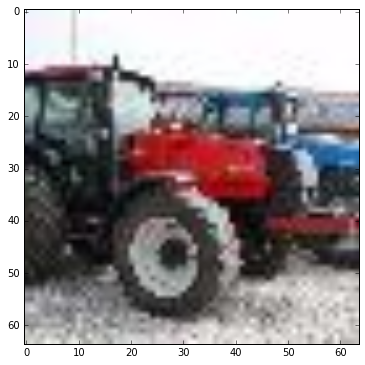

Actual label: tractor
Top 5 predictions:
['tractor', 'lawn mower', 'go-kart', 'convertible', 'sports car']




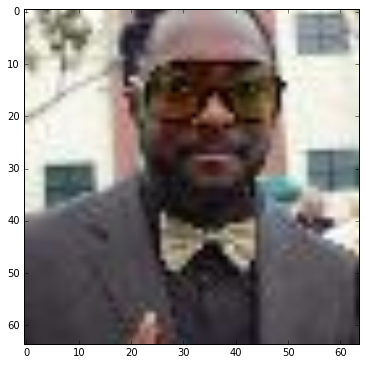

Actual label: bow tie
Top 5 predictions:
['military uniform', 'bow tie', 'sombrero', 'neck brace', 'sunglasses']




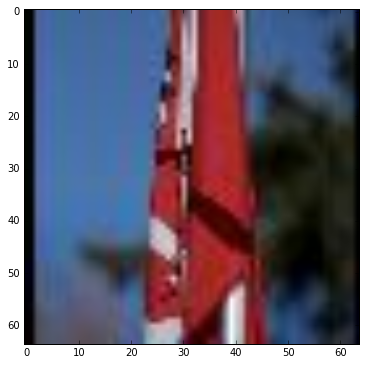

Actual label: pole
Top 5 predictions:
['projectile', 'syringe', 'candle', 'oboe', 'drumstick']




In [5]:
N = 10  # number of validation examples to view
filenames_labels = load_filenames_labels('val')
pick_N = random.sample(filenames_labels, N)
imgs = np.zeros((N, 64, 64, 3), dtype=np.uint8)
labels = []
for i, filename_label in enumerate(pick_N):
    imgs[i, :, :, :] = scipy.ndimage.imread(filename_label[0], mode='RGB')
    labels.append(class_description[int(filename_label[1])])
    
config = TrainConfig()
top_k = predict(imgs, config)
for idx, filename in enumerate(pick_N):
    preds = map(lambda x: class_description[x], top_k[idx])
    plt.imshow(imgs[idx, :, :, :])
    plt.show()
    print('Actual label: ' + labels[idx])
    print('Top 5 predictions:')
    preds = map(lambda x: class_description[x], top_k[idx])
    print([x for x in preds])
    print('\n')
